In [7]:
# Importing Libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

# Preprocessing purpose
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# For getting the importances
from sklearn.ensemble import RandomForestClassifier

# Splitting Data
from sklearn.model_selection import train_test_split

# For Decision tree, accuracy, Classification Report, Confusion Matrix
from sklearn import metrics
from sklearn import tree

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Uploading datasets for training,testing and prediction
dataset = pd.read_csv('./Datasets/UNSW_NB15_training-set.csv')

In [9]:
# Display initial training data
dataset.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


In [10]:
print('Total attack categories and count in training data')
print()
print(dataset['attack_cat'].value_counts())
print()

Total attack categories and count in training data

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64



In [11]:
SS = StandardScaler()

# extract numerical attributes and scale it to have unit standard deviation 
cols = dataset.select_dtypes(include=['float64','int64']).columns
intCols = SS.fit_transform(dataset.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
intColsDf = pd.DataFrame(intCols, columns = cols)

In [12]:
intColsDf.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,...,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04
mean,5.523337e-18,-5.350732e-18,-5.868545e-18,-1.208230e-18,-1.542651e-18,-9.234328e-18,6.800608e-17,-1.301436e-16,-1.284176e-16,1.933168e-17,...,-5.454295e-17,-8.388567e-17,4.280586e-17,6.213754e-18,-7.076775e-18,1.726043e-18,-2.934273e-17,1.173709e-17,8.285005e-18,1.014913e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.732030e+00,-2.137298e-01,-1.319225e-01,-1.518164e-01,-4.643353e-02,-8.736871e-02,-5.545094e-01,-1.782709e+00,-8.203947e-01,-3.588833e-01,...,-4.683116e-01,-4.501865e-01,-5.655971e-01,-9.085748e-02,-9.061736e-02,-2.031428e-01,-6.400328e-01,-7.341074e-01,-1.060701e-01,-1.106883e+00
25%,-8.660149e-01,-2.137281e-01,-1.244551e-01,-1.518164e-01,-4.590918e-02,-8.736871e-02,-5.543169e-01,-1.171948e+00,-8.203947e-01,-3.588210e-01,...,-4.683116e-01,-4.501865e-01,-5.655971e-01,-9.085748e-02,-9.061736e-02,-2.031428e-01,-6.400328e-01,-6.441902e-01,-1.060701e-01,-1.106883e+00
50%,0.000000e+00,-2.107283e-01,-9.458553e-02,-1.345114e-01,-4.346222e-02,-8.619357e-02,-5.366774e-01,7.194401e-01,-5.718240e-01,-3.556752e-01,...,-4.683116e-01,-4.501865e-01,-3.903909e-01,-9.085748e-02,-9.061736e-02,-2.031428e-01,-4.059469e-01,-3.744387e-01,-1.060701e-01,9.034381e-01
75%,8.660149e-01,-6.101285e-02,-4.978117e-02,-6.529130e-02,-3.911594e-02,-8.105725e-02,1.931121e-01,7.194401e-01,1.339599e+00,3.301660e-03,...,-1.107215e-01,-1.120831e-01,-1.275816e-01,-9.085748e-02,-9.061736e-02,-2.031428e-01,6.222472e-02,1.650644e-01,-1.060701e-01,9.034381e-01
max,1.732030e+00,1.252400e+01,7.935848e+01,9.518155e+01,8.359169e+01,9.668083e+01,6.174084e+00,7.292910e-01,1.348170e+00,2.893044e+01,...,6.445097e+00,5.804726e+00,4.865795e+00,2.184603e+01,2.153462e+01,2.484858e+01,6.265499e+00,4.750840e+00,9.427730e+00,9.034381e-01


In [13]:
LE = LabelEncoder()

# extract categorical attributes from both training and test sets
objCols = dataset.select_dtypes(include=['object']).copy()

# encode the categorical attributes
LEobjCols = objCols.apply(LE.fit_transform)

# separate target column from encoded data 
enctrain = LEobjCols.drop(['attack_cat'], axis=1)
lir_tar_train = LEobjCols['attack_cat']

In [14]:
train_x = pd.concat([intColsDf,enctrain],axis=1)
train_y = dataset['attack_cat']
train_x.shape

(82332, 44)

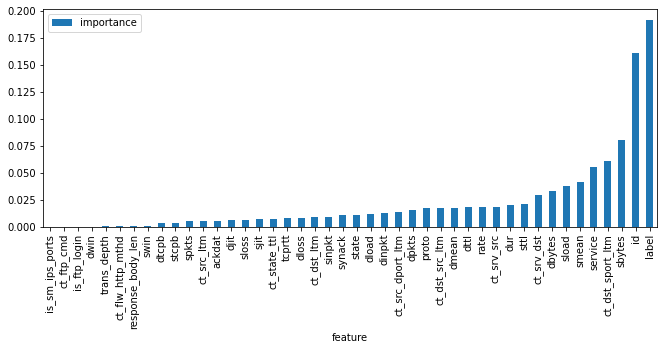

In [12]:
#Checking which variable is useful in calculating the target variable

rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=True).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [15]:
# Splitting training data for training and testing the ML models
X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,test_size=0.80, random_state=2)

In [16]:
#Training different Machine Learning models for comapritive analysis
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0) #Decision Tree Classifier
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
models = []
models.append(('Decision Tree Classifier', DTC_Classifier))

In [18]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Decision Tree Classifier Model Evaluation ==============================
Model Accuracy:
 1.0

Confusion matrix:
 [[ 123    0    0    0    0    0    0    0    0    0]
 [   0  118    0    0    0    0    0    0    0    0]
 [   0    0  792    0    0    0    0    0    0    0]
 [   0    0    0 2235    0    0    0    0    0    0]
 [   0    0    0    0 1211    0    0    0    0    0]
 [   0    0    0    0    0 3767    0    0    0    0]
 [   0    0    0    0    0    0 7431    0    0    0]
 [   0    0    0    0    0    0    0  703    0    0]
 [   0    0    0    0    0    0    0    0   79    0]
 [   0    0    0    0    0    0    0    0    0    7]]

Classification report:
                 precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       123
      Backdoor       1.00      1.00      1.00       118
           DoS       1.00      1.00      1.00       792
      Exploits       1.00      1.00      1.00      2235
       Fuzzers   

In [19]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.875565542161358

Confusion matrix:
 [[   48    95   114   175   114     0     0     8     0     0]
 [   73    21    90   154   109     6     0     8     4     0]
 [   90    90  1097  1454   308    55     0   171    32     0]
 [  119   160  1436  6111   517   124     0   334    64    32]
 [   80   109   290   491  3729    46     0    55    51     0]
 [    3     2    81   202    66 14727     0    11    12     0]
 [    0     0     0     0     0     0 29569     0     0     0]
 [    4     5   177   307    49     8     0  2222    20     1]
 [    1     0    34    45    44    10     0    17   145     3]
 [    0     0     0    24     7     2     0     1     2     1]]

Classification report:
                 precision    recall  f1-score   support

      Analysis       0.11      0.09      0.10       554
      Backdoor       0.04      0.05      0.04       465
           D

In [18]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose = 0,ignore_warnings = True, custom_metric = None)
models,predictions = clf.fit(X_train,X_test,Y_train,Y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [09:43<00:00, 20.13s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.89,0.52,None,0.89,2.49
RandomForestClassifier,0.89,0.52,None,0.89,5.00
DecisionTreeClassifier,0.88,0.51,None,0.87,1.32
ExtraTreesClassifier,0.88,0.50,None,0.88,3.83
QuadraticDiscriminantAnalysis,0.78,0.50,None,0.80,1.31
ExtraTreeClassifier,0.86,0.49,None,0.86,1.19
GaussianNB,0.68,0.46,None,0.73,1.26
SVC,0.87,0.46,None,0.87,61.19
SGDClassifier,0.85,0.46,None,0.85,1.41
